## IS Extended Project

# Problem Statement 1

## Business Context

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

## Objective

Based on the given data, answer the following questions.

1. What is the probability that a randomly selected CMSU student will be male?

2. What is the probability that a randomly selected CMSU student will be female?

3. What is the conditional probability of different majors among the male students in CMSU?

4. What is the conditional probability of different majors among the female students of CMSU?

5. What is the probability That a randomly chosen student is a male and intends to graduate?

6. What is the probability that a randomly selected student is a female and does NOT have a laptop?

7. What is the probability that a randomly chosen student is a male or has full-time employment?

8. What is the conditional probability that given a female student is randomly chosen, she is majoring in international business or management?

9.  If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

10. What is the conditional probability that a randomly selected male earns 50 or more?

11. What is the conditional probability that a randomly selected female earns 50 or more? 

12. Are the continuous variables in the data normally distributed? Write a note summarizing your conclusions.

#### **Note**: Assume that the sample is representative of the population of CMSU.

## Data Description

**ID:** A unique identifier for each undergraduate student.

**Gender:** The gender of the student.

**Age:** The age of the student. It is a numeric value representing the student's age in years.

**Class:** The student's current academic class or year.

**Major:** The student's declared major field of study.

**Grad Intention:** The student's intention regarding graduation. It can have categorical values such as "Yes" or "No" indicating whether the student intends to graduate or not.

**GPA:** The student's grade point average. It is a numeric value representing the student's academic performance.

**Employment:** The employment status of the student. It can have categorical values such as "Full-time," "Part-time," or "Unemployed."

**Salary:** The student's monthly salary. It is a numeric value representing the amount in dollars.

**Social Networking:** The amount of time the student spends on social networking per day. It is a numeric value representing the time in hours.

**Satisfaction:** The student's satisfaction level with their college experience. It is a numeric value representing the satisfaction on a scale.

**Spending:** The amount of money the student spends per semester. It is a numeric value representing the amount in dollars.

**Computer:** The type of device of student.

**Text Messages:** The number of text messages the student sends per day. It is a numeric value.

## Importing necessary libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [12]:
df= pd.read_csv('Survey.csv') ##  Fill the blank to read the data

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [15]:
df.head() ##  Complete the code to view top 5 rows of the data

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [16]:
df.tail() ##  Complete the code to view last 5 rows of the data

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


### Understand the shape of the dataset

In [18]:
df.shape ##  Complete the code to view dimensions of the data

(62, 14)

### Check the data types of the columns for the dataset

In [20]:
df.dtypes ##  Complete the code to check the data types of the columns for the dataset

ID                     int64
Gender                object
Age                    int64
Class                 object
Major                 object
Grad Intention        object
GPA                  float64
Employment            object
Salary               float64
Social Networking      int64
Satisfaction           int64
Spending               int64
Computer              object
Text Messages          int64
dtype: object

### Check the missing values in the dataset

In [22]:
df.isnull().sum() ##  Complete the code to check the missing values in the dataset

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

### Let's check the statistical summary of the data

In [24]:
df.describe() ##  Complete the code to print the statistical summary of the data

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


## 1. What is the probability that a randomly selected CMSU student will be male?

In [26]:
No_of_male = (df['Gender'] =='Male').sum() ##  Complete the code to find the number of Male Students in the CMSU Dataset
print(No_of_male)

29


In [27]:
Total_value =df['Gender'].count() ##  Complete the code to find the total number of students in the CMSU Dataset
print(Total_value)

62


In [28]:
p_male = No_of_male/Total_value

print('The probability that a randomly selected CMSU student will be a male is:',(p_male)*100)

The probability that a randomly selected CMSU student will be a male is: 46.774193548387096


### 2. What is the probability that a randomly selected CMSU student will be female?

In [30]:
No_of_female = (df['Gender'] =='Female').sum() ##  Complete the code to find the number of Female Students in the CMSU Dataset
print(No_of_female)

33


In [31]:
p_female= No_of_female/Total_value

print('The probability that a randomly selected CMSU student will be a female is:',(p_female)*100)

The probability that a randomly selected CMSU student will be a female is: 53.2258064516129


### 3. What is the conditional probability of different majors among the male students in CMSU?

In [33]:
male_majors = pd.crosstab(df[df['Gender'] == 'Male']['Major'], columns='count')
male_majors_conditional = male_majors / male_majors.sum()
male_majors_conditional = male_majors_conditional.sort_values(by='count', ascending=False)

print("Conditional Probability of Different Majors among Male Students in CMSU:")
print(male_majors_conditional)

Conditional Probability of Different Majors among Male Students in CMSU:
col_0                      count
Major                           
Management              0.206897
Retailing/Marketing     0.172414
Accounting              0.137931
Economics/Finance       0.137931
Other                   0.137931
Undecided               0.103448
International Business  0.068966
CIS                     0.034483


### 4. What is the conditional probability of different majors among the female students of CMSU?

In [35]:
female_majors = pd.crosstab(df[df['Gender'] == 'Female']['Major'], columns='count')
female_majors_conditional = female_majors / female_majors.sum()
female_majors_conditional = female_majors_conditional.sort_values(by='count', ascending=False)

print("Conditional Probability of Different Majors among Female Students in CMSU:")
print(female_majors_conditional)

Conditional Probability of Different Majors among Female Students in CMSU:
col_0                      count
Major                           
Retailing/Marketing     0.272727
Economics/Finance       0.212121
International Business  0.121212
Management              0.121212
Accounting              0.090909
CIS                     0.090909
Other                   0.090909


### 5. What is the probability That a randomly chosen student is a male and intends to graduate?

In [37]:
male_grad_intention = df[df['Gender'] == 'Male']['Grad Intention'].value_counts(normalize=True)['Yes']

print("Probability that a randomly chosen student is a male and intends to graduate:", (male_grad_intention)*100)

Probability that a randomly chosen student is a male and intends to graduate: 58.620689655172406


### 6. What is the probability that a randomly selected student is a female and does NOT have a laptop?

In [39]:
female_no_laptop = df[df['Gender'] == 'Female']['Computer'].value_counts(normalize=True)[['Desktop', 'Tablet']].sum()

print("Probability that a randomly selected student is a female and does NOT have a laptop:", (female_no_laptop)*100)

Probability that a randomly selected student is a female and does NOT have a laptop: 12.121212121212121


### 7.  What is the probability that a randomly chosen student is a male or has full-time employment?

In [41]:
male_or_fulltime = ((df['Gender'] == 'Male') | (df['Employment'] == 'Full-Time')).mean()

print("Probability that a randomly chosen student is a male or has full-time employment:", (male_or_fulltime)*100)

Probability that a randomly chosen student is a male or has full-time employment: 51.61290322580645


### 8. What is the conditional probability that given a female student is randomly chosen, she is majoring in international business or management?

In [43]:
female_international_business_or_management = df[df['Gender'] == 'Female']['Major'].isin(['International Business', 'Management']).mean()

print("Conditional probability that given a female student is randomly chosen, she is majoring in international business or management:", female_international_business_or_management)

Conditional probability that given a female student is randomly chosen, she is majoring in international business or management: 0.24242424242424243


### 9. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [45]:
prob_gpa_less_than_3 = (df['GPA'] < 3).mean()

print("Probability that a randomly chosen student has a GPA less than 3:", (prob_gpa_less_than_3)*100)

Probability that a randomly chosen student has a GPA less than 3: 27.419354838709676


### 10. What is the conditional probability that a randomly selected male earns 50 or more? 

In [47]:
male_earns_50_or_more = (df[df['Gender'] == 'Male']['Salary'] >= 50).mean()

print("Conditional probability that a randomly selected male earns 50 or more:", (male_earns_50_or_more)*100)

Conditional probability that a randomly selected male earns 50 or more: 48.275862068965516


### 11. What is the conditional probability that a randomly selected female earns 50 or more? 

In [49]:
female_earns_50_or_more = (df[df['Gender'] == 'Female']['Salary'] >= 50).mean()

print("Conditional probability that a randomly selected female earns 50 or more:", (female_earns_50_or_more)*100)

Conditional probability that a randomly selected female earns 50 or more: 54.54545454545454


 ### 12. Are the continuous variables in the data normally distributed? Write a note summarizing your conclusions.

We have four numerical variables in the data - GPA, Salary, Spending, and Text Messages.

To assess whether they follow a normal distribution, we'll do the following:

1. **Visually examine the data distribution and check the skew values**
2. **Examine the probability plots**

**Let us first examine the data distribution and check the skew values.**

skew value of GPA is -0.3146000894506981
skew value of Salary is 0.5347008436225946
skew value of Spending is 1.5859147414045331
skew value of Text Message is 1.2958079731054333


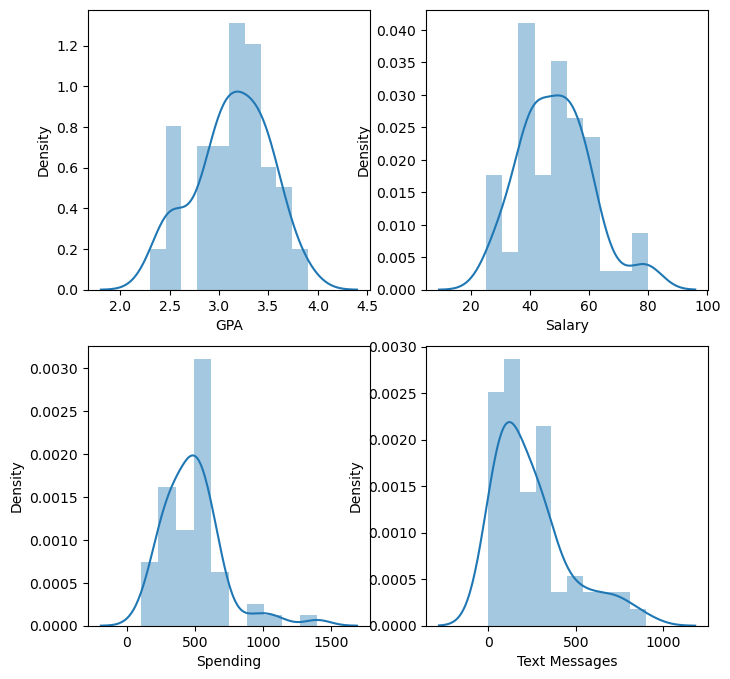

In [53]:
plt.figure(figsize=[8, 8])

plt.subplot(2, 2, 1)
sns.distplot(df['GPA'], bins = 10, kde=True, rug= False);
print('skew value of GPA is', df['GPA'].skew())

plt.subplot(2, 2, 2)
sns.distplot(df['Salary'], bins = 10, kde=True, rug= False);
print('skew value of Salary is', df['Salary'].skew())


plt.subplot(2, 2, 3)
sns.distplot(df['Spending'], bins = 10, kde=True, rug= False);
print('skew value of Spending is', df['Spending'].skew())


plt.subplot(2, 2, 4)
sns.distplot(df['Text Messages'], bins = 10, kde=True, rug= False);
print('skew value of Text Message is', df['Text Messages'].skew())

plt.show()

**Now, let us examine the probability plots**

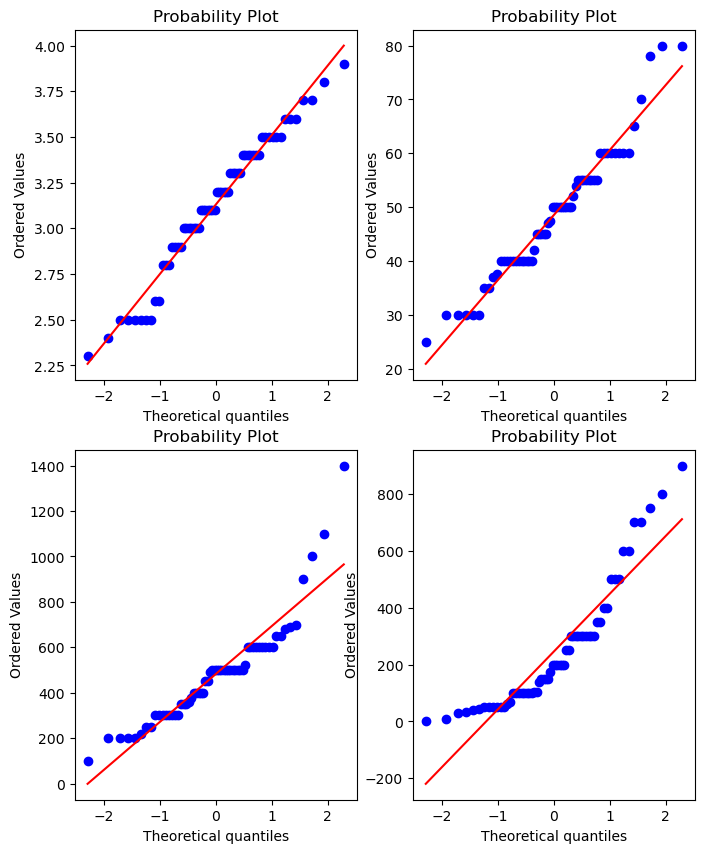

In [55]:
plt.figure(figsize=[8, 10])

plt.subplot(2, 2, 1)
stats.probplot(df['GPA'], plot=plt);


plt.subplot(2, 2, 2)
stats.probplot(df['Salary'], plot=plt);


plt.subplot(2, 2, 3)
stats.probplot(df['Spending'], plot=plt);


plt.subplot(2, 2, 4)
stats.probplot(df['Text Messages'], plot=plt);

plt.show()

*Write down the conclusions here*

# Problem Statement 2

## Business Context

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

## Objective

Based on the above context, the manufacturer wants to understand the following:

1. Is there any evidence that mean moisture content in both types of shingles are within the permissible limits?

2. Is the population mean for shingles A and B are equal?

Use the relevant statistical tests to answer the above questions and state your conclusions along with all necessary steps.

**Hint**:
* Use the test for equality of means for the second question


## Importing necessary libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from   scipy.stats import ttest_1samp, ttest_ind
import statsmodels.stats.api as sm

## Importing Dataset

In [65]:
df1= pd.read_csv('A+&+B+shingles.csv') ##  Fill the blank to read the data

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [68]:
df1.head() ##  Complete the code to view top 5 rows of the data

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [69]:
df1.tail() ##  Complete the code to view last 5 rows of the data

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


### Understand the shape of the dataset

In [71]:
df1.shape ##  Complete the code to view dimensions of the data

(36, 2)

### Check the data types of the columns for the dataset

In [73]:
df1.dtypes ##  Complete the code to Check the data types of the columns for the dataset

A    float64
B    float64
dtype: object

### Check the missing values in the dataset

In [75]:
df1.isnull().sum() ##  Complete the code to Check the missing values in the dataset

A    0
B    5
dtype: int64

### Let's check the statistical summary of the data

In [77]:
df1.describe() ##  Complete the code to Check the statistical summary of the data

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


## 1. Is there any evidence that mean moisture content in both types of shingles are within the permissible limits?

### Sample A

#### Step 1: Define null and alternate hypotheses

Testing whether the moisture content is less the permissible limit

The null hypothesis states that the moisture content of sample A is greater or than equal to the permissible limit of 0.35

$$𝐻_0 : \mu \geq 0.35$$

The alternative hypothesis states that the moisture content of sample A is less than permissible limit.

$$𝐻_𝐴 : \mu < 0.35$$

#### Step 2: Decide the significance level

Here we select 𝛼 = 0.05 as given in the question.

#### Step 3: Identify the test statistic

We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for A sample. One tail test for sample A

#### Step 4: Calculate the p - value and test statistic

In [87]:
t_statistic, p_value = ttest_1samp(df1['A'],0.35, nan_policy='omit')
print('tstat',t_statistic)
print('P Value',p_value/2)

tstat -1.4735046253382782
P Value 0.07477633144907513


#### Step 5: Decide to reject or accept null hypothesis

In [89]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is greater than permissible limit in sample A.')

one-sample t-test p-value= 0.07477633144907513
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is greater than permissible limit in sample A.


### Define Null and alternate hypothesis for sample B

### Sample B

#### Step 1:

Testing whether the moisture content is less the permissible limit

The null hypothesis states that the moisture content of sample B is greater or than equal to the permissible limit of 0.35

$$𝐻_0 : \mu \geq 0.35$$

The alternative hypothesis states that the moisture content of sample B is less than permissible limit.

$$𝐻_𝐴 : \mu < 0.35$$

#### Step 2: Decide the significance level

Here we select 𝛼 = 0.05 as given in the question.

#### Step 3: Identify the test statistic

We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for B sample. one tail test for Sample B

#### Step 4: Calculate the p - value and test statistic

In [99]:
t_statistic, p_value = ttest_1samp(df1['B'],0.35, nan_policy='omit')
print('tstat',t_statistic)
print('P Value',p_value/2)

tstat -3.1003313069986995
P Value 0.0020904774003191813


#### Step 5: Decide to reject or accept null hypothesis

In [101]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is less than permissible limit in sample B.')

else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

one-sample t-test p-value= 0.0020904774003191813
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is less than permissible limit in sample B.


## 2.Is the population mean for shingles A and B are equal?

#### Step 1:

#### Define Null and alternate hypothesis

#### Step 2: Decide the significance level

Here we select 𝛼 = 0.05 as the population standard deviation is not known.

#### Step 3: Identify the test statistic

We have two samples and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for two sample test.

#### Step 4: Calculate the p - value and test statistic

In [111]:
t_statistic, p_value  = ttest_ind(df1['A'],df1['B'],nan_policy='omit')
print('tstat',t_statistic)
print('P Value',p_value)

tstat 1.289628271966112
P Value 0.2017496571835328


#### Step 5: Decide to reject or accept null hypothesis

In [113]:
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean for shingles A and singles B are not the same')

two-sample t-test p-value= 0.2017496571835328
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that mean for shingles A and singles B are not the same


# Problem Statement 3:

## Business Context

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor's, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education–occupation combination.

## Objective

Based on the above context, we want to understand the following:

1. Is there any significant difference in salaries among different levels of education?
2. Is there any significant difference in salaries among different levels of  different occupations?
3. Is there a significant interaction between Education and Occupation on Salary?

Use the relevant statistical tests to answer the above questions and state your conclusions along with all necessary steps.

#### **Note**: Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.

## Importing Dataset

In [120]:
df= pd.read_csv('SalaryData.csv') ##  Fill the blank to read the data

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [123]:
df.head() ##  Complete the code to view top 5 rows of the data

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [124]:
df.tail() ##  Complete the code to view last 5 rows of the data

,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


### Understand the shape of the dataset

In [126]:
df.shape ##  Complete the code to view dimensions of the data

(40, 3)

### Check the data types of the columns for the dataset

In [128]:
df.dtypes ##  Complete the code to check the data types of the columns for the dataset

Education     object
Occupation    object
Salary         int64
dtype: object

### Check the missing values in the dataset

In [197]:
df.isnull().sum() ##  Complete the code to check the missing values in the dataset

Education     0
Occupation    0
Salary        0
dtype: int64

### Let's check the statistical summary of the data

In [132]:
df.describe() ##  Complete the code to print the statistical summary of the data

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


### 1. Is there any significant difference in salaries among different levels of education?

#### State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Null hypothesis (H0): There is no significant difference in salaries among different levels of education or different occupations.
Alternate hypothesis (H1): There is a significant difference in salaries among different levels of education or different occupations.

#### One-Way ANOVA: Salary with respect to Education

In [137]:
df=pd.read_csv('SalaryData.csv') ##  Fill the blank to read the data

In [205]:
import scipy.stats as stats

# Perform one-way ANOVA
anova_edu = stats.f_oneway(df[df['Education'] == 'Doctorate']['Salary'],
                           df[df['Education'] == 'Bachelors']['Salary'],
                           df[df['Education'] == 'HS-grad']['Salary'])

# Interpret ANOVA results
if anova_edu.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference in salaries based on education.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in salaries based on education.")


Fail to reject the null hypothesis. There is no significant difference in salaries based on education.


### 2. Is there any significant difference in salaries among different levels of different occupations?

#### One-Way ANOVA: Salary with respect to Occupation

In [211]:
# Perform one-way ANOVA
anova_occ = stats.f_oneway(df[df['Occupation'] == 'Adm-clerical']['Salary'],
                           df[df['Occupation'] == 'Sales']['Salary'],
                           df[df['Occupation'] == 'Prof-specialty']['Salary'],
                           df[df['Occupation'] == 'Exec-managerial']['Salary'])

# Interpret ANOVA results
if anova_occ.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference in salaries based on occupation.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in salaries based on occupation.")


Fail to reject the null hypothesis. There is no significant difference in salaries based on occupation.


### 3. Is there a significant interaction between Education and Occupation on Salary?

In [215]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('Salary ~ Education + Occupation + Education:Occupation', data=df).fit()
anova_two_way = sm.stats.anova_lm(model)

# Interpret ANOVA results
if anova_two_way['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis. There is a significant interaction between Education and Occupation on Salary.")
else:
    print("Fail to reject the null hypothesis. There is no significant interaction between Education and Occupation on Salary.")


Reject the null hypothesis. There is a significant interaction between Education and Occupation on Salary.


#### Business implications of performing ANOVA for this particular case study.

Performing ANOVA in this case study helps understand the relationship between Salary and the factors Education and Occupation. The results provide insights into how salaries vary across different levels of education and occupation categories. If significant differences are found, it can aid in making informed decisions related to salary structures, career paths, and educational requirements. For example, if there are significant differences in salaries based on education levels, organizations may consider adjusting compensation or designing targeted professional development programs to enhance employee qualifications. Similarly, if significant differences are observed based on occupation, businesses can strategize recruitment, promotion, or compensation strategies to align with the demands and competencies associated with different job roles.

Additionally, the two-way ANOVA examines the interaction effect between Education and Occupation. If a significant interaction is present, it indicates that the effect of one factor (e.g., Education) on Salary may depend on the levels of the other factor (e.g., Occupation). This finding can guide organizations in understanding the complex interplay between education and occupation and how it influences salary outcomes, providing insights for talent management, job design, and performance evaluation.